<h1><center><span style="color:red">Installs and Imports</span></center></h1>

In [1]:
#!pip uninstall sklearn
#!pip uninstall scikit-learn
#!pip install -U numpy
#!pip install numpy
#!pip install -U pandas
#!pip install pandas
#!pip install -U scipy
#!pip install scipy
#!pip install -U scikit-learn
#!pip install scikit-learn
#!pip install sklearn
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
#!pip install -U wget
#!pip install wget
#!pip install -U geopy
#!pip install geopy
#!pip install -U folium
#!pip install folium
#!pip install folium==0.5.0
#!pip install xlrd
#!pip install -U xlrd
#!pip install openpyxl
#!pip install -U openpyxl
#!pip install geocoder
#!pip install geopandas
print('...INSTALLS DONE')

...INSTALLS DONE


In [2]:
import numpy as np                                   # library to handle data in a vectorized manner
import pandas as pd                                  # library for data analsysis
from pandas import json_normalize                    # module to tranform JSON file into a pandas dataframe
import json                                          # library to handle JSON files
import requests                                      # library to handle requests such as when webscraping
# import sklearn                                       # library for predictive data analysis
# from sklearn.model_selection import train_test_split # module for splitting data for test and train
# from sklearn.cluster import KMeans                   # module for KMeans Clustering
# from sklearn import svm                              # module for Support Vector Machines Classification
# from sklearn.neighbors import KNeighborsClassifier   # module for K Nearest Neighbor Classification
# from sklearn.linear_model import LogisticRegression  # module for Logistic Regression Classification
# from sklearn.tree import DecisionTreeClassifier      # module for Decision Tree Classification
# from sklearn import tree                             # module for visualizing Decision Trees
# from sklearn import preprocessing                    # module for standardizes data for downstream estimators
# from sklearn import metrics                          # module for computes subset accuracy
# from sklearn.metrics import confusion_matrix         # module for Confusion Matrix display
# from sklearn.metrics import jaccard_score            # module for Jaccard scoring
# from sklearn.metrics import classification_report    # module for Classification Report
# from sklearn.metrics import log_loss                 # module for Log Loss scoring
# from sklearn.metrics import f1_score                 # module for F1 scoring
import matplotlib.pyplot as plt                      # module for interactive plots
import matplotlib.cm as cm                           # module for colormap handling
import matplotlib.colors as colors                   # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.image as mpimg                     # module for basic image loading, rescaling and display operations
import urllib.request                                # module for pulling in URL data
import wget                                          # module for importing externally hosted files
#import xlrd                                          # library for importing Excel .xls files (but not .xlsx)
#from openpyxl import Workbook                        # module to write to a new Excel file
#from openpyxl import load_workbook                   # module to import Excel files (including .xlsx)
import folium                                        # library for map rendering
from folium import plugins                           # module for folium plugins
from folium.plugins import HeatMap                   # module for folium heatmap
import geopandas                                     # library for mapping
import fiona                                         # dependency of geopandas
import shapely                                       # dependency of geopandas
import pyproj                                        # dependency of geopandas
import rtree                                         # dependency of geopandas
import descartes                                     # dependency of geopandas
#import pylab as pl                                   # pylab is a convenience module that bulk imports matplotlib.pyplot and numpy, no longer recommended
# import scipy.optimize as opt                         # package provides several commonly used optimization algorithms
import itertools                                     # library for creating iterators for efficient looping
from io import StringIO                              # library to create an in-memory file-like object
from bs4 import BeautifulSoup                        # library for webscraping
from geopy.geocoders import Nominatim                # library to find lat/long from address

#%matplotlib inline                                   # magic function so output of plotting commands is displayed inline
#import pydotplus                                     # library for Python interface to Graphviz's Dot language
#from pandas.io.json import json_normalize            # deprecated version of tranform JSON file into a pandas dataframe

print('...LIBRARIES IMPORTED')

...LIBRARIES IMPORTED


<h1><center><span style="color:red">Setting Basic Variables</span></center></h1>

In [3]:
# @hidden_cell
# text above will make this cell hidden when shared from Watson Studio to GitHub

my_id = 'xxxxx'
my_secret = 'xxxxx'
my_token = 'xxxxx'
census_key = 'xxxxx'

print('...HIDDEN VARIABLES SET')

...HIDDEN VARIABLES SET


In [4]:
# setting some basic variables

CLIENT_ID = my_id                          # your Foursquare ID
CLIENT_SECRET = my_secret                  # your Foursquare Secret
ACCESS_TOKEN = my_token                    # your Foursquare Access Token
VERSION = '20210401'                       # Foursquare API version
LIMIT = 1000                               # A default Foursquare API limit value
RADIUS = 2000                              # search / explore radius in meters
VENUE_SEARCH = '4af3a181f964a520fcee21e3'  # ID of venue to be searched for
SEARCH_LOC = 'Boston, MA'                  # location key for SEARCH or EXPLORE endpoint (near=)
SEARCH_CAT_ID = '4d4b7105d754a06374d81259' # category key for SEARCH or EXPLORE endpoint (categoryId=)
SECTION = 'food'                           # section key for EXPLORE endpoint (section=)
OFFSET = 100                               # offset key for EXPLORE endpoint (offset=)

print('...FOURSQUARE API CREDENTIALS SET')

...FOURSQUARE API CREDENTIALS SET


In [5]:
# geolocator to get basic coordinates
address = 'Boston, MA'
geolocator = Nominatim(user_agent="rsgd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("coordinates: latitude",latitude,"/ longitude",longitude)

coordinates: latitude 42.3602534 / longitude -71.0582912


<h1><center><span style="color:red">File Imports</span></center></h1>

In [6]:
# download Mapshaper-derived neighborhood JSON files
datafile_url = ("https://raw.githubusercontent.com/rsgdodge/Coursera_Capstone/master/data")
NeighborhoodJSON = f"{datafile_url}/Mapshaper_GeoJSON_Boston.json"
# NeighborhoodTOPO = f"{datafile_url}/Mapshaper_TopoJSON_output.json"

N_AllstonJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Allston.json"
N_Back_BayJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Back_Bay.json"
N_Beacon_HillJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Beacon_Hill.json"
N_BrightonJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Brighton.json"
N_CharlestownJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Charlestown.json"
N_DorchesterJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Dorchester.json"
N_DowntownJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Downtown.json"
N_East_BostonJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_East_Boston.json"
N_FenwayJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Fenway.json"
N_Harbor_IslandsJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Harbor_Islands.json"
N_Hyde_ParkJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Hyde_Park.json"
N_Jamaica_PlainJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Jamaica_Plain.json"
N_LMAJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_LMA.json"
N_MattapanJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Mattapan.json"
N_Mission_HillJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Mission_Hill.json"
N_North_EndJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_North_End.json"
N_RoslindaleJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Roslindale.json"
N_RoxburyJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Roxbury.json"
N_South_BostonJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_South_Boston.json"
N_South_Boston_WaterfrontJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_South_Boston_Waterfront.json"
N_South_EndJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_South_End.json"
N_WaterJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_Water.json"
N_West_EndJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_West_End.json"
N_West_RoxburyJSON = f"{datafile_url}/Mapshaper_GeoJSON_output_West_Roxbury.json"

# download countries geojson file of Boston Census Tracts
GeoDataJSON=geopandas.read_file('https://opendata.arcgis.com/datasets/4a8eb4fb3be44ed5a1eec28551b9f3b2_0.geojson')

print(".....JSON FILES IMPORTED")

.....JSON FILES IMPORTED


In [9]:
# importing list of neighborhoods
BPDA_Neighborhoods = pd.read_csv(r'https://raw.githubusercontent.com/rsgdodge/Coursera_Capstone/master/data/BPDA_Neighborhoods.csv')
BPDA_Neighborhoods.head()

GEOID10   NAME10            NAMELSAD10 2014 BPDA Neighborhood
0  25025990101  9901.01  Census Tract 9901.01                (water)
1  25025000703     7.03     Census Tract 7.03                Allston
2  25025000704     7.04     Census Tract 7.04                Allston
3  25025000802     8.02     Census Tract 8.02                Allston
4  25025000803     8.03     Census Tract 8.03                Allston

In [70]:
# importing list of higher level categories
Broad_Categories = pd.read_csv(r'https://raw.githubusercontent.com/rsgdodge/Coursera_Capstone/master/data/Broad_Categories.csv')
Broad_Categories.head()

Venue Category Broad Category    Short Type
0    African Restaurant        African       African
1  Ethiopian Restaurant        African     Ethiopian
2   American Restaurant       American      American
3             BBQ Joint       American     BBQ Joint
4          Burger Joint       American  Burger Joint

In [7]:
GeoDataJSON.head()

FID  OBJECTID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10  NAME10  \
0    1         1        25        025    010405  25025010405  104.05   
1    2         2        25        025    010404  25025010404  104.04   
2    3         3        25        025    010801  25025010801  108.01   
3    4         4        25        025    010702  25025010702  107.02   
4    5         5        25        025    010204  25025010204  102.04   

            NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 104.05   G5020          S   363702         0  +42.3398654   
1  Census Tract 104.04   G5020          S   136829         0  +42.3419667   
2  Census Tract 108.01   G5020          S   127905         0  +42.3541193   
3  Census Tract 107.02   G5020          S   299981         0  +42.3518354   
4  Census Tract 102.04   G5020          S   254706         0  +42.3462887   

     INTPTLON10    Shape_STAr    Shape_STLe    Shape__Area  Shape__Length  \
0  -071.0896052  3.914568e+06  14629.550361  666099.906250    6036.192858   
1  -071.0886375  1.472714e+06   5277.643216  250612.402344    2176.592125   
2  -071.0770216  1.376667e+06   6166.497167  234357.902344    2542.042976   
3  -071.0755159  3.228780e+06   7818.852369  549614.046875    3224.572988   
4  -071.1033879  2.741497e+06   7621.654206  466585.234375    3143.610963   

                                            geometry  
0  POLYGON ((-71.09009 42.34667, -71.09001 42.346...  
1  POLYGON ((-71.09066 42.33977, -71.09103 42.339...  
2  POLYGON ((-71.08160 42.35371, -71.08044 42.354...  
3  POLYGON ((-71.07066 42.35186, -71.07046 42.351...  
4  POLYGON ((-71.10683 42.34876, -71.10520 42.348...

<AxesSubplot:>

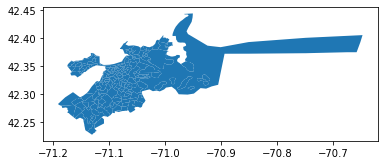

In [8]:
# geopandas "plot()" will plot what's in the GeoJSON itself, not overlaid on a folium map
GeoDataJSON.plot()

<h1><center><span style="color:red">Venue Data Work Begins</span></center></h1>

In [11]:
# adding Neighborhood data to GeoDataJSON. This appears to turn it into a dataframe, we will fix later.
Boston_Geo = pd.merge(GeoDataJSON, BPDA_Neighborhoods, on='NAMELSAD10') # join on key
Boston_Geo.drop(columns=['GEOID10_y', 'NAME10_y'], inplace=True) # drop duplicate columns
Boston_Geo.rename(columns={"2014 BPDA Neighborhood":"Neighborhood","GEOID10_x":"GEOID10",
                           "NAME10_x":"NAME10"}, inplace=True) # rename Neighborhood column
BostonGeo = Boston_Geo.to_json() # converting the merged Boston_Geo dataframe back into a JSON for use in a map
Boston_Geo.head()

FID  OBJECTID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10  NAME10  \
0    1         1        25        025    010405  25025010405  104.05   
1    2         2        25        025    010404  25025010404  104.04   
2    3         3        25        025    010801  25025010801  108.01   
3    4         4        25        025    010702  25025010702  107.02   
4    5         5        25        025    010204  25025010204  102.04   

            NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 104.05   G5020          S   363702         0  +42.3398654   
1  Census Tract 104.04   G5020          S   136829         0  +42.3419667   
2  Census Tract 108.01   G5020          S   127905         0  +42.3541193   
3  Census Tract 107.02   G5020          S   299981         0  +42.3518354   
4  Census Tract 102.04   G5020          S   254706         0  +42.3462887   

     INTPTLON10    Shape_STAr    Shape_STLe    Shape__Area  Shape__Length  \
0  -071.0896052  3.914568e+06  14629.550361  666099.906250    6036.192858   
1  -071.0886375  1.472714e+06   5277.643216  250612.402344    2176.592125   
2  -071.0770216  1.376667e+06   6166.497167  234357.902344    2542.042976   
3  -071.0755159  3.228780e+06   7818.852369  549614.046875    3224.572988   
4  -071.1033879  2.741497e+06   7621.654206  466585.234375    3143.610963   

                                            geometry Neighborhood  
0  POLYGON ((-71.09009 42.34667, -71.09001 42.346...       Fenway  
1  POLYGON ((-71.09066 42.33977, -71.09103 42.339...       Fenway  
2  POLYGON ((-71.08160 42.35371, -71.08044 42.354...     Back Bay  
3  POLYGON ((-71.07066 42.35186, -71.07046 42.351...     Back Bay  
4  POLYGON ((-71.10683 42.34876, -71.10520 42.348...       Fenway

In [12]:
# create "getNearbyVenues" function with Lat+Lng from input, remainder from basic variables at top

def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            SECTION,
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['location']['distance']
            ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_ID',
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category',
                  'Venue_Distance']
    
    return(nearby_venues)
print("...'getNearbyVenues' FUNCTION CREATED")

...'getNearbyVenues' FUNCTION CREATED


In [13]:
# create "getNearbyVenues100" function with Lat+Lng from input, remainder from basic variables at top

def getNearbyVenues100(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section={}&radius={}&limit={}&offset=100'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            SECTION,
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['location']['distance']
            ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_ID',
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category',
                  'Venue_Distance']
    
    return(nearby_venues)
print("...'getNearbyVenues100' FUNCTION CREATED")

...'getNearbyVenues100' FUNCTION CREATED


In [14]:
# create "getNearbyVenues200" function with Lat+Lng from input, remainder from basic variables at top

def getNearbyVenues200(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section={}&radius={}&limit={}&offset=200'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            SECTION,
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['location']['distance']
            ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_ID',
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category',
                  'Venue_Distance']
    
    return(nearby_venues)
print("...'getNearbyVenues200' FUNCTION CREATED")

...'getNearbyVenues200' FUNCTION CREATED


In [15]:
# create "getNearbyVenues300" function with Lat+Lng from input, remainder from basic variables at top

def getNearbyVenues300(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section={}&radius={}&limit={}&offset=300'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            SECTION,
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['location']['distance']
            ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_ID',
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category',
                  'Venue_Distance']
    
    return(nearby_venues)
print("...'getNearbyVenues300' FUNCTION CREATED")

...'getNearbyVenues300' FUNCTION CREATED


In [16]:
# to run function
boston_venues000 = getNearbyVenues(names=Boston_Geo['Neighborhood'],
                                   latitudes=Boston_Geo['INTPTLAT10'],
                                   longitudes=Boston_Geo['INTPTLON10'])

Fenway
Fenway
Back Bay
Back Bay
Fenway
Back Bay
Fenway
Allston
Brighton
Allston
Fenway
Allston
Roxbury
Jamaica Plain
Jamaica Plain
Roslindale
Brighton
Brighton
Hyde Park
Hyde Park
Hyde Park
Hyde Park
Hyde Park
West Roxbury
West Roxbury
West Roxbury
West Roxbury
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
West Roxbury
Roslindale
Roslindale
Roslindale
Mattapan
Mattapan
Mattapan
Mattapan
Mattapan
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
East Boston
South Boston
(water)
Back Bay
Beacon Hill
Jamaica Plain
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Mattapan
Hyde Park
Hyde Park
Jamaica Plain
Jamaica Plain
South End
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Roxbury
Roxbury
Dorchester
Dorchester
Harbor Islands
Charlestown
Fenway
Roslindale
Roslindale
Jamaica Plain
Dorchester
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Jamaica Plain
Roslindale
Roslin

In [17]:
boston_venues000.shape

(14519, 9)

In [18]:
boston_venues100 = getNearbyVenues100(names=Boston_Geo['Neighborhood'],
                                   latitudes=Boston_Geo['INTPTLAT10'],
                                   longitudes=Boston_Geo['INTPTLON10'])

Fenway
Fenway
Back Bay
Back Bay
Fenway
Back Bay
Fenway
Allston
Brighton
Allston
Fenway
Allston
Roxbury
Jamaica Plain
Jamaica Plain
Roslindale
Brighton
Brighton
Hyde Park
Hyde Park
Hyde Park
Hyde Park
Hyde Park
West Roxbury
West Roxbury
West Roxbury
West Roxbury
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
West Roxbury
Roslindale
Roslindale
Roslindale
Mattapan
Mattapan
Mattapan
Mattapan
Mattapan
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
East Boston
South Boston
(water)
Back Bay
Beacon Hill
Jamaica Plain
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Mattapan
Hyde Park
Hyde Park
Jamaica Plain
Jamaica Plain
South End
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Roxbury
Roxbury
Dorchester
Dorchester
Harbor Islands
Charlestown
Fenway
Roslindale
Roslindale
Jamaica Plain
Dorchester
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Jamaica Plain
Roslindale
Roslin

In [19]:
boston_venues100.shape

(6680, 9)

In [20]:
boston_venues200 = getNearbyVenues200(names=Boston_Geo['Neighborhood'],
                                   latitudes=Boston_Geo['INTPTLAT10'],
                                   longitudes=Boston_Geo['INTPTLON10'])

Fenway
Fenway
Back Bay
Back Bay
Fenway
Back Bay
Fenway
Allston
Brighton
Allston
Fenway
Allston
Roxbury
Jamaica Plain
Jamaica Plain
Roslindale
Brighton
Brighton
Hyde Park
Hyde Park
Hyde Park
Hyde Park
Hyde Park
West Roxbury
West Roxbury
West Roxbury
West Roxbury
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
West Roxbury
Roslindale
Roslindale
Roslindale
Mattapan
Mattapan
Mattapan
Mattapan
Mattapan
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
East Boston
South Boston
(water)
Back Bay
Beacon Hill
Jamaica Plain
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Mattapan
Hyde Park
Hyde Park
Jamaica Plain
Jamaica Plain
South End
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Roxbury
Roxbury
Dorchester
Dorchester
Harbor Islands
Charlestown
Fenway
Roslindale
Roslindale
Jamaica Plain
Dorchester
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Jamaica Plain
Roslindale
Roslin

In [21]:
boston_venues200.shape

(1870, 9)

In [22]:
# boston_venues300 = getNearbyVenues300(names=Boston_Geo['Neighborhood'],
#                                    latitudes=Boston_Geo['INTPTLAT10'],
#                                    longitudes=Boston_Geo['INTPTLON10'])

In [23]:
# boston_venues300.shape

In [24]:
boston_venues_int = boston_venues000.append(boston_venues100, ignore_index=True)
boston_venues = boston_venues_int.append(boston_venues200, ignore_index=True)

# removing duplicate entries
length_before = len(boston_venues)
boston_venues.sort_values(by=['Venue_ID','Venue_Distance'], # sorting the data
                          ignore_index=True, inplace=True) # adding last two arguements resets the index to the new order
# the "subset" parameter specifies which columns to match on, otherwise it matches on all fields
boston_venues.drop_duplicates(subset=['Venue_ID','Venue_Latitude',
                                      'Venue_Longitude'], keep='first', ignore_index=True,inplace=True)
length_after = len(boston_venues)

print("before",length_before,"/ after",length_after)

before 23069 / after 2351


In [25]:
boston_venues['VenLat'] = boston_venues['Venue_Latitude'].astype('object')
boston_venues['VenLon'] = boston_venues['Venue_Longitude'].astype('object')
boston_venues.head()

Neighborhood Neighborhood Latitude Neighborhood Longitude  \
0     Back Bay           +42.3497223           -071.0838808   
1     Back Bay           +42.3497223           -071.0838808   
2  Beacon Hill           +42.3577086           -071.0694112   
3    South End           +42.3432584           -071.0753771   
4    South End           +42.3432584           -071.0753771   

                Venue                  Venue_ID  Venue_Latitude  \
0  The Capital Grille  3fd66200f964a5200eec1ee3       42.347680   
1         Casa Romero  3fd66200f964a52010ec1ee3       42.349420   
2                Figs  3fd66200f964a5201fec1ee3       42.357255   
3           Giacomo's  3fd66200f964a52021ec1ee3       42.343952   
4            Hungry I  3fd66200f964a5202aec1ee3       42.358094   

   Venue_Longitude       Venue_Category  Venue_Distance     VenLat     VenLon  
0       -71.085359  American Restaurant             257   42.34768 -71.085359  
1       -71.084410   Mexican Restaurant              55   42.34942  -71.08441  
2       -71.070007          Pizza Place              70  42.357255 -71.070007  
3       -71.077646   Italian Restaurant             201  42.343952 -71.077646  
4       -71.070462    French Restaurant            1700  42.358094 -71.070462

In [26]:
# create "getCensusInfo" function with Lat+Lng from input CLEANED
def getCensusInfo(ven_ids, lats, lons):
    census_list=[]
    for ven_id, lat, lng in zip(ven_ids, lats, lons):
        print(ven_id)
        url_batch_geocode = 'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={}&y={}&benchmark=4&vintage=410&format=json'.format(
            lng,
            lat)
        census_results = requests.get(url_batch_geocode).json()['result']['geographies']['Census Tracts']
        census_list.append([(ven_id,
                             lat,
                             lng,
                             v['POP100'],
                             v['GEOID'],
                             v['INTPTLAT'],
                             v['NAME'],
                             v['INTPTLON'],
                             v['HU100']) for v in census_results])
    census_info = pd.DataFrame([item for loc_list in census_list for item in loc_list])
    census_info.columns = ['Venue_ID',
                           'Venue_Latitude',
                           'Venue_Longitude',
                           'Population',
                           'GEOID',
                           'INTPTLAT',
                           'NAME',
                           'INTPTLON',
                           'Housing_Units']
    return(census_info)
print("...'getCensusInfo' FUNCTION CREATED")

...'getCensusInfo' FUNCTION CREATED


In [27]:
census_response = getCensusInfo(ven_ids=boston_venues['Venue_ID'],
                                lats=boston_venues['VenLat'],
                                lons=boston_venues['VenLon'])

3fd66200f964a5200eec1ee3
3fd66200f964a52010ec1ee3
3fd66200f964a5201fec1ee3
3fd66200f964a52021ec1ee3
3fd66200f964a5202aec1ee3
3fd66200f964a5202fec1ee3
3fd66200f964a52032ec1ee3
3fd66200f964a5203eec1ee3
3fd66200f964a5203ef11ee3
3fd66200f964a52042ec1ee3
3fd66200f964a52044ec1ee3
3fd66200f964a52045ec1ee3
3fd66200f964a5204dec1ee3
3fd66200f964a52058ec1ee3
3fd66200f964a5205fec1ee3
3fd66200f964a52065ec1ee3
3fd66200f964a52076ec1ee3
3fd66200f964a52077ec1ee3
3fd66200f964a52096ec1ee3
3fd66200f964a52098ec1ee3
3fd66200f964a5209aec1ee3
3fd66200f964a520bbed1ee3
3fd66200f964a520c2eb1ee3
3fd66200f964a520c9eb1ee3
3fd66200f964a520d3eb1ee3
3fd66200f964a520ddeb1ee3
3fd66200f964a520e0eb1ee3
3fd66200f964a520e1eb1ee3
3fd66200f964a520e5eb1ee3
3fd66200f964a520eaeb1ee3
3fd66200f964a520efeb1ee3
3fd66200f964a520f6eb1ee3
40b28c80f964a5200bf81ee3
40b28c80f964a5200ff81ee3
40b28c80f964a5202ff81ee3
40b28c80f964a52046f81ee3
40b28c80f964a52070f81ee3
40b28c80f964a5207dff1ee3
40b28c80f964a52092f81ee3
40b28c80f964a52098f71ee3


4ab91d73f964a520127e20e3
4aba3cf7f964a5209d8020e3
4aba5262f964a520de8020e3
4abaa330f964a520368220e3
4abae13bf964a5203e8320e3
4abcf2cff964a520cc8720e3
4abe367cf964a520fd8b20e3
4abe4eaaf964a520968c20e3
4abe5f07f964a520098d20e3
4abf8549f964a520f69020e3
4ac19ad4f964a520939720e3
4ac28281f964a520749920e3
4ac39a93f964a520f59b20e3
4ac3a6b8f964a520319c20e3
4ac4dfeff964a520549f20e3
4ac53112f964a520dbb020e3
4ac53aedf964a5201cb120e3
4ac573a4f964a52014b220e3
4ac6242bf964a520f3b220e3
4ac63050f964a52022b320e3
4ac69084f964a52014b520e3
4ac780e4f964a5209fb720e3
4ac7f9fcf964a520fbba20e3
4ac80468f964a52039bb20e3
4ac9207ff964a520c2be20e3
4ac92fa6f964a5200ebf20e3
4aca1cc6f964a5206ec020e3
4aca29d3f964a520aec020e3
4aca2a0bf964a520b2c020e3
4aca6e05f964a520e8c120e3
4acac4adf964a52011c320e3
4acbab78f964a520e7c420e3
4accca58f964a52087c920e3
4acd506af964a520d1cb20e3
4ace0fadf964a52023ce20e3
4ace803cf964a520ead020e3
4ace808af964a520edd020e3
4ace9d7ff964a52072d120e3
4acf5de6f964a52040d320e3
4acf7498f964a520ced320e3


4b6e281bf964a52076ae2ce3
4b6ec94ef964a5208bca2ce3
4b6eef62f964a520e5d12ce3
4b6f49d6f964a5206de92ce3
4b71ff9df964a5203b692de3
4b72d2d9f964a520578a2de3
4b72f2c0f964a5207e912de3
4b74a3d3f964a52095e92de3
4b74bb58f964a5201aef2de3
4b758e61f964a520e7132ee3
4b75e76af964a520812d2ee3
4b75fa84f964a520d2332ee3
4b76c725f964a520815e2ee3
4b78470df964a52080c12ee3
4b785bb5f964a52023c82ee3
4b78b487f964a520a5de2ee3
4b79687ff964a520f6f72ee3
4b7b78f1f964a520d1642fe3
4b7c28e9f964a52017812fe3
4b7c5679f964a520388d2fe3
4b7d8710f964a52096c42fe3
4b7daa12f964a52039cd2fe3
4b7dc1eaf964a520c0d22fe3
4b7de708f964a520edd82fe3
4b7f10e0f964a520f51330e3
4b7f60e2f964a520202b30e3
4b7fe885f964a520b84330e3
4b80125ff964a5208f4f30e3
4b802221f964a520455530e3
4b807c2bf964a520af7630e3
4b808efbf964a520c37c30e3
4b80d762f964a5209d8e30e3
4b817777f964a52003a830e3
4b8192eaf964a520ffaf30e3
4b83073cf964a5206bf330e3
4b83e0caf964a520d91431e3
4b846c27f964a520833431e3
4b85985df964a5207f6731e3
4b86acbcf964a520889531e3
4b87dfe3f964a52086d031e3


4c462246342c1b8dffb5b589
4c46242bdd35be9a96fddcd8
4c48ab5876d72d7f3d47414d
4c49960ca3ace21eac2fcc3b
4c4f13a0f53d0f475cdc94a7
4c50b891875fef3b93dd6dd1
4c51dc0c048b1b8d03b8a32f
4c52e8669d642d7fc892cddf
4c52fc4899ecc9b6c1f0a55b
4c53024c250dd13a2e939b7f
4c5370084623be9acc9312f1
4c5611e23e2220a18aa05ba5
4c599ad92091a593c9475dd0
4c59fc4667ac0f4727af054c
4c5aada86407d13a4022b528
4c5cb07e6147be9aac1d9009
4c5da3756ebe2d7f6968d32e
4c5dcb6a94fd0f470086cc45
4c5ef54f857ca5932ffad0cb
4c606fd8cd522d7f2922ce3f
4c608370de6920a148289664
4c6086751e5cd13abbe8a1ed
4c612a1fb6f3be9af4f66073
4c61f132e1621b8d2d6e2253
4c61f765fa7bc928782f0d27
4c62e4aaedd320a13a06ae29
4c6560837451b713d3a2160c
4c65d0d09cb82d7f0c018fd2
4c66c2899cb82d7f5d7191d2
4c69789e0e98a59346872459
4c69cfba0e98a59309852559
4c6ab60d96f176b01afab636
4c6b24b56d390f4734420a9a
4c6d61681fb2a1437bf5fde6
4c6dcbb8c5243704ad5429eb
4c6dcd106af58cfac1ae8a17
4c6edf2bfa49a1cdbf3fa1e3
4c6f167fb5a5236ac9374c52
4c730ce18efc3704e0b4147d
4c7466d76f789c74b8d7444c


4e77a26752b1c8e51a685fa4
4e7e9cc78b81bf6ff9fec3ef
4e83c45ebe7b87d6abc12316
4e84fd3861af4ecf7107c645
4e8607930aafdd0b12236aee
4e874f3129c2b1ce5b801bd6
4e8a331629c236ffa9bdb319
4e9ef6946da161b08dc6d4e4
4ea48597e3008f7d92f6b63a
4eaa16129a522a65ae999143
4eaec23ef7906795c43ea22e
4eb321ca9adfed3c00bd4891
4eb477aee5fa17fc865c74fe
4eb8576b991165b7639cd610
4eb97749e5e874370589776a
4eba8a516d86b3f5acdb8974
4ebd77dbe300ba10442b60f2
4ec16b00775b98876ee5915c
4ec30aee02d5226e6e8d17ad
4ec656ca6da1d1092d29869f
4ec67fa3754a92231fb62fbf
4ec84984e3007199161b7ede
4ec9abdb0aaf9c3ccef4933f
4ecacfb59a52a68084d22db4
4ed3bd22e5faa5ec06accea2
4ed578ef8b81e3224623faeb
4ed7b6f200391b6e35e135c1
4ed91c4b9a5286d91dc2942b
4edac42ed3e346be34d57a7a
4edc138b46907c1b44b0b556
4edce2dc77c8274e0010b6b7
4edceffe6c2547bc65a883e4
4edeaaab9a52cb6e8e7f9a49
4ee2524b2fb608f30ab321a8
4ee2e19cd3e34ebcee5d7b8d
4ee382d46da14e7d98c97115
4ee78bf5722e0a32852d7398
4efc9ba26c25fa32050b8955
4eff4273be7bbcd4f308357c
4effd3fc6da1cd0358e49e8e


523e0804498ec8d8e0d44521
52420689498eee6f591a8025
5242361811d2318d797005b3
5245b31811d203696e63e284
5249ad0711d2b17b03a2b3c7
524df383498e173afeab0a9a
525051dd11d209611c268066
525c0ab6498ed87745838970
525da4dd498eb92d634abc6f
525ea11211d2f9ee46e0bb7c
526170c911d2366882091001
526e884911d283eca6c6e732
52703b4a11d26055846269e5
52792ebb498e254814bf817f
527bcd2b11d2760259508044
527c360911d2eca0bb8890a9
528034f611d2e5cd05edda07
5280d68411d2a61aa4b8f686
5283b04a498e8fbfea229f4f
52840d9211d298eac8e4bb56
5286b94a11d28f01e1d33808
528ed6f311d2782026f3db76
528feaae11d20de9fd0955bd
52928b7f11d2bb11172f3269
5292a52411d28b1efbb04337
5293ef69498e009610e3fdf1
52968ea011d285c7b32c69bd
5298fc5011d2ab52873e2b04
529cb2fb11d262fb3f14769d
529d0b3911d2e1c994c39b59
52a7a59611d2d54d52cf9e64
52a9e5c611d272d34c168c68
52acf521498ea34d7b39f062
52af405f498e9cc9d709e73c
52b9c0cb498eaffe14f7e162
52bd5d7f11d22fac5f712e67
52c8b598498e5d88931a7e1d
52d08725498e40b08c4c56d5
52d56ef0498ef39cb9d6ca3c
52d89f5a498ee12acc96e55c


57a3c368498ebefd59d05f44
57a50fbc498e6c05045175fa
57a5e646498eb12aa8995d3b
57afa8a8498e68c2f425250e
57b32f53498ebbf559439ce9
57b74d81498edb84968e0ea2
57b8f231498edaf10572c782
57c091f7498e1efc0c9c904c
57c5fc61498e8cb2ab18ada8
57ca20c4498ecc39c44ebeac
57d0a299498eb9d6942d3ff5
57d1d861498e8267bbe82bc4
57d388e0cd1065b75a362b94
57d42bff498e26f21bd3f4b3
57d6fabfcd1004bb567d1fe3
57dd803d498ee6758095bd1f
57ded2b3498ead9195511f5d
57df24c0498e90b0a1084a1b
57e01d7bcd10fe734f46310f
57e3081a498e23c5288a57c1
57ec47e0498e389e490041cc
57ed57d0498ef073bfc026dd
57f3cfdc498ede68f909b6cc
57fabc3ecd10f93048cf1ced
57fb560c498eab93fedbc335
57fbb58e498e466c222aa37d
58010c86d67cf0750bcb9602
58027b5d38faed5f8ec26c32
5807a41638fad61b2ebda69c
58098b54d67cd1299baeb3cb
580abd1fd67cd5bd37b37eaa
580fff4938facc4e70a30904
581085c738fa62276ee3e76e
5818960c38fa5b61b65ab4b3
581a6c4d873be4765996abe2
581cb445cb54576c366ee56f
58263f91eaf46a4e320d4075
58266e00da08cb6d47d48021
582ceb03761b1a60999af08c
5830b8e6761b1a3f49b804d9


5d443a7776efa400081ab605
5d4da4fddbdd3d000818986d
5d51ed7846156b0008620aa3
5d56cf06127e2f0008997d61
5d582889db1cb90008c81d53
5d65ac7be034310008c78583
5d695b4491c0a9000892d608
5d7ad0023b3ee000080c7f45
5d8bd3a000952c000774bd67
5d8dc5081e15aa0007ef6c58
5d946a794fd9fd00084aa54a
5d97f16ca7cf4a0008869bb2
5d9bcc00aa006a000807eab6
5d9e252cf66549000806c7e3
5d9e5d8ebc323e00070963fe
5d9f6db18bd5fc00081618e4
5da3812a7932e5000825a22d
5da4acdabbc0df0008cda9ac
5da89f8efb06640008f95b2a
5dbec8194b82690008279df6
5dc05702142eea000879ece6
5dcc35d49acef00007ac8f22
5de1d108aa0c3b00088242c1
5de4247ba7140a0008ae99d9
5de5c480e61ab000081b4fcd
5de7e19f99c9580008ee8de8
5de7f41cefe5410008a45c0e
5df11682101ef600081d27cf
5df1483ecc4b9c00082633c8
5dfd384d898a6a0008269479
5e0748d239b9820008a4387a
5e0df470cbf5c90008ebc377
5e2be675354cad0007a38209
5e2f59d4919a3000077b494c
5e4b37ae83bccd00082466d0
5e5201374d7cf80008261791
5e5585f95ad97f00083daae1
5e580aeb9a3b050008094147
5e5ed809c948ba000856003f
5eaf6880597345000854ea8b


In [28]:
census_response.shape

(2351, 9)

In [29]:
# adding Census data to Venue data
boston_venue_census = pd.merge(boston_venues, census_response, on='Venue_ID')
boston_venue_census.drop(columns=['Venue_Latitude_y', 'Venue_Longitude_y'], inplace=True) # drop duplicate columns
boston_venue_census.rename(columns={"Venue_Latitude_x":"Venue_Latitude", "Venue_Longitude_x":"Venue_Longitude",
                                    "GEOID":"GEOID10","NAME":"NAMELSAD10"}, inplace=True) # rename columns
boston_venue_census=boston_venue_census[['Venue_ID','Venue','Venue_Category','VenLat','VenLon','Population',
                                         'Housing_Units','GEOID10','NAMELSAD10','INTPTLAT','INTPTLON']] # re-ordering

# GEOID10 format: SSCCCTTTTT
# STATE: 2 digits
# COUNTY: 3 digits
# TRACT: 6 digits
# 25025020101 = STATE 25, COUNTY 025, TRACT 020101 (201.01)
# if it doesn't start "25025" then it's not in Suffolk County
# Chelsea MA 1601.01, 1602, 1603, 1604, 1605.01, 1605.02, 1606.01, 1606.02
# Revere MA 1701, 1702, 1703, 1704, 1705.01, 1705.02, 1706.01, 1707.01, 1707.02, 1708
# Winthrop MA 1801.01, 1802, 1803.01, 1804, 1805

boston_venue_census = boston_venue_census[boston_venue_census.GEOID10.str.startswith(('25025'))] # drop non-Suffolk
boston_venue_census = boston_venue_census[~boston_venue_census.GEOID10.str.startswith(('25025160'))] # drop Chelsea
boston_venue_census = boston_venue_census[~boston_venue_census.GEOID10.str.startswith(('25025170'))] # drop Revere
boston_venue_census = boston_venue_census[~boston_venue_census.GEOID10.str.startswith(('25025180'))] # drop Winthrop
boston_venue_census.shape

(1666, 11)

In [39]:
# RADIUS = 2250
# raw = 15272, 7500, 2194
# duplicate removal = before 24966 / after 2316
# outside of Boston removal = 1595

# RADIUS = 2000
# raw = 14519, 6680, 1870
# duplicate removal = before 23069 / after 2351
# outside of Boston removal = 1666

In [71]:
# adding Neighborhood data to Venue/Census data
boston_neigh = pd.merge(boston_venue_census, Boston_Geo, how='inner', on='NAMELSAD10') # join on key
boston_neigh.drop(columns=['GEOID10_y'], inplace=True) # drop duplicate column
boston_neigh.rename(columns={"Venue_Category":"Venue Category","Venue_ID":"Venue ID","GEOID10_x":"GEOID10",
                            "Housing_Units":"Housing Units"}, inplace=True) # rename columns
boston_neigh['VenLatNum'] = boston_neigh['VenLat'].astype('float64')
boston_neigh['VenLonNum'] = boston_neigh['VenLon'].astype('float64')

# adding Broad Category to Venue/Census/Neighborhood data
boston_combined = pd.merge(boston_neigh, Broad_Categories, how='left', on='Venue Category') # join on key
boston_combined=boston_combined[['Venue ID','Venue','Venue Category','Broad Category','Short Type','VenLat','VenLatNum',
                                 'VenLon','VenLonNum','Neighborhood','Population','Housing Units','GEOID10','NAMELSAD10',
                                 'INTPTLAT','INTPTLON','FID','OBJECTID','STATEFP10','COUNTYFP10','TRACTCE10','NAME10',
                                 'MTFCC10','FUNCSTAT10','ALAND10','AWATER10','INTPTLAT10','INTPTLON10','Shape_STAr',
                                 'Shape_STLe','Shape__Area','Shape__Length','geometry']] # re-ordering columns

boston_combined.shape

(1666, 33)

In [72]:
# creating the base map
map_boston_venues = folium.Map(location=[latitude, longitude], zoom_start=12, control_scale=True, prefer_canvas=True)

# style_one = {'fillColor':'#00FFFFFF','lineColor':'#00FFFFFF'}

# adding venue marker layer
feature_group = folium.FeatureGroup('Venues')
for lat, lng, venue, category in zip(boston_combined['VenLat'], boston_combined['VenLon'], boston_combined['Venue'], 
                                     boston_combined['Venue Category']):
    label = '{} ({})'.format(venue,category)
    label = folium.Popup(label, parse_html=True, max_width=120)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='black', # can be basic color name or hex
        fill=True,
        fill_color='gray', # can be basic color name or hex
        fill_opacity=0.7,
        parse_html=False,
        zIndexOffset=1000, # supposed to keep markers on top, but...
        name="Venues").add_to(feature_group)
    feature_group.add_to(map_boston_venues)

# adding GeoJSON layers
nh_gjson = folium.GeoJson(NeighborhoodJSON, name="Neighborhoods", zoom_on_click=False).add_to(map_boston_venues)
folium.features.GeoJsonPopup(fields=['Neighborhood'],labels=False).add_to(nh_gjson)
ct_gjson = folium.GeoJson(BostonGeo, name="Census Tracts", zoom_on_click=True).add_to(map_boston_venues)
folium.features.GeoJsonPopup(fields=['Neighborhood','NAMELSAD10'],labels=False).add_to(ct_gjson)

# adding heatmap layer
VenueArr = boston_combined[['VenLatNum', 'VenLonNum']].values
map_boston_venues.add_child(plugins.HeatMap(VenueArr, radius=15, name="Heat"))

# adding title    
# title_html = '''<h3 align="center" style="font-size:20px"><b>Boston Venues</b></h3>'''
# map_boston_venues.get_root().html.add_child(folium.Element(title_html))

# adding layer toggle
folium.LayerControl().add_to(map_boston_venues)

# adding fullscreen toggle
plugins.Fullscreen(position="topleft",title="Fullscreen",title_cancel="Exit Fullscreen",
                   force_separate_button=True,).add_to(map_boston_venues)

map_boston_venues

In [73]:
map_heat = folium.Map(location=[latitude, longitude], zoom_start=13, control_scale=True)

VenueArr = boston_combined[['VenLatNum', 'VenLonNum']].values

map_heat.add_child(plugins.HeatMap(VenueArr, radius=15))
folium.TileLayer('cartodbpositron').add_to(map_heat) #adds light monochrome 'cartodbpositron'
#folium.TileLayer('cartodbdark_matter').add_to(map_heat) #adds dark monochrome 'cartodbdark_matter'

# adding fullscreen toggle
plugins.Fullscreen(position="topleft",title="Fullscreen",title_cancel="Exit Fullscreen",
                   force_separate_button=True,).add_to(map_heat)

In [74]:
map_heat

In [75]:
boston_combined.groupby('Neighborhood', dropna=False)[["Venue ID"]].count()

Venue ID
Neighborhood                        
Allston                           71
Back Bay                          70
Beacon Hill                       30
Brighton                         119
Charlestown                       40
Dorchester                       164
Downtown/Chinatown/Leather       178
East Boston                      167
Fenway                           103
Harbor Islands                     4
Hyde Park                         44
Jamaica Plain                     82
Longwood Medical Area             11
Mattapan                          26
Mission Hill                      47
North End                         49
Roslindale                        51
Roxbury                           69
South Boston                      62
South Boston Waterfront           89
South End                        118
West End                          20
West Roxbury                      52

In [76]:
boston_combined.groupby('Broad Category', dropna=False)[["Venue ID"]].count()

Venue ID
Broad Category             
African                   7
American                250
Asian (East)            157
Asian (General)          34
Asian (Southeast)        54
Asian (West)             20
Baked Goods             159
Caribbean                18
European                 27
Fast Food                43
General                 266
Indian                   18
Italian                  93
Latin American          107
Mediterranean            45
Pizza                   188
Sandwich                 69
Seafood                  66
Specialty                45

In [77]:
#boston_combined.groupby('Venue Category', dropna=False)[["Venue ID"]].count()
boston_combined.groupby('Venue Category', dropna=False)["Venue ID"].count().sort_values(ascending=False)

Venue Category
Pizza Place                    188
American Restaurant            105
Café                            97
Italian Restaurant              93
Donut Shop                      82
                              ... 
Eastern European Restaurant      1
Empanada Restaurant              1
Mac & Cheese Joint               1
Israeli Restaurant               1
Afghan Restaurant                1
Name: Venue ID, Length: 89, dtype: int64

<h1><center><span style="color:red">Population Data Work Begins</span></center></h1>

In [55]:
# create "getCensusPop" function with Lat+Lng from input CLEANED
def getCensusPop(hoods, lats, lons):
    census_list=[]
    for hood, lat, lng in zip(hoods, lats, lons):
        print(hood)
        url_batch_geocode = 'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={}&y={}&benchmark=4&vintage=410&format=json'.format(
            lng,
            lat)
        census_results = requests.get(url_batch_geocode).json()['result']['geographies']['Census Tracts']
        census_list.append([(hood,
                             lat,
                             lng,
                             v['POP100'],
                             v['GEOID'],
                             v['INTPTLAT'],
                             v['NAME'],
                             v['INTPTLON'],
                             v['HU100']) for v in census_results])
    census_info = pd.DataFrame([item for loc_list in census_list for item in loc_list])
    census_info.columns = ['Neighborhood',
                           'Hood_Latitude',
                           'Hood_Longitude',
                           'Population',
                           'GEOID',
                           'INTPTLAT',
                           'NAME',
                           'INTPTLON',
                           'Housing_Units']
    return(census_info)
print("...'getCensusInfo' FUNCTION CREATED")

...'getCensusInfo' FUNCTION CREATED


In [56]:
census_pop = getCensusPop(hoods=Boston_Geo['Neighborhood'],
                                lats=Boston_Geo['INTPTLAT10'],
                                lons=Boston_Geo['INTPTLON10'])

Fenway
Fenway
Back Bay
Back Bay
Fenway
Back Bay
Fenway
Allston
Brighton
Allston
Fenway
Allston
Roxbury
Jamaica Plain
Jamaica Plain
Roslindale
Brighton
Brighton
Hyde Park
Hyde Park
Hyde Park
Hyde Park
Hyde Park
West Roxbury
West Roxbury
West Roxbury
West Roxbury
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
West Roxbury
Roslindale
Roslindale
Roslindale
Mattapan
Mattapan
Mattapan
Mattapan
Mattapan
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
East Boston
South Boston
(water)
Back Bay
Beacon Hill
Jamaica Plain
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Mattapan
Hyde Park
Hyde Park
Jamaica Plain
Jamaica Plain
South End
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Dorchester
Roxbury
Roxbury
Dorchester
Dorchester
Harbor Islands
Charlestown
Fenway
Roslindale
Roslindale
Jamaica Plain
Dorchester
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Roxbury
Jamaica Plain
Roslindale
Roslin

In [57]:
census_pop.shape

(181, 9)

In [58]:
census_population=census_pop[['Neighborhood','Population','Housing_Units','GEOID','NAME','INTPTLAT','INTPTLON',
                              'Hood_Latitude', 'Hood_Longitude']] # re-ordering columns

census_population.rename(columns={"GEOID":"GEOID10", "NAME":"NAMELSAD10",
                                  "Housing_Units":"Housing Units"}, inplace=True) # rename columns

census_population.drop(columns=['Hood_Latitude', 'Hood_Longitude'], inplace=True) # drop duplicate columns

# removing duplicate entries
length_before = len(census_population)
census_population.sort_values(by=['Neighborhood','GEOID10'], # sorting the data
                              ignore_index=True, inplace=True) # adding last two arguements resets the index to the new order
# the "subset" parameter specifies which columns to match on, otherwise it matches on all fields
census_population.drop_duplicates(subset=['GEOID10','NAMELSAD10'], keep='first', ignore_index=True,inplace=True)
length_after = len(census_population)
print("before",length_before,"/ after",length_after)

before 181 / after 181


In [59]:
census_population.head()

Neighborhood  Population  Housing Units      GEOID10            NAMELSAD10  \
0      (water)           0              0  25025990101  Census Tract 9901.01   
1      Allston        2791           1418  25025000703     Census Tract 7.03   
2      Allston        4801           2405  25025000704     Census Tract 7.04   
3      Allston        8136           3129  25025000802     Census Tract 8.02   
4      Allston        6584            946  25025000803     Census Tract 8.03   

      INTPTLAT      INTPTLON  
0  +42.3659318  -070.9792895  
1  +42.3513284  -071.1282176  
2  +42.3500028  -071.1334045  
3  +42.3568717  -071.1297577  
4  +42.3594779  -071.1212633

In [60]:
# adding Population data to GeoDataJSON. This appears to turn it into a dataframe, we will fix later.
boston_pop = pd.merge(GeoDataJSON, census_population, on='NAMELSAD10') # join on key

boston_pop.drop(columns=['GEOID10_y'], inplace=True) # drop duplicate columns

boston_pop.rename(columns={"GEOID10_x":"GEOID10"}, inplace=True) # rename Neighborhood column

boston_pop=boston_pop[['Neighborhood','Population','Housing Units','INTPTLAT','INTPTLON','FID','OBJECTID','STATEFP10',
                       'COUNTYFP10','TRACTCE10','GEOID10','NAME10','NAMELSAD10','MTFCC10','FUNCSTAT10','ALAND10',
                       'AWATER10','INTPTLAT10','INTPTLON10','Shape_STAr','Shape_STLe','Shape__Area',
                       'Shape__Length','geometry']] # re-ordering columns

boston_pop['Pop per HU'] = boston_pop['Population'] / boston_pop['Housing Units'] # creating derived field

boston_pop['Pop per HU'].replace(np.inf,0,inplace=True)

# ATTEMPTING TO ADDRESS ABBERANT HUGE VALUES
# df.apply(lambda x: np.where(x < x.quantile(),np.nan,x))
# boston_pop['Pop per HU'] = boston_pop['Pop per HU'].clip_upper(6)
# boston_pop['Pop per HU'] = boston_pop['Pop per HU'].apply(lambda x: [y if y < 9 else 1 for y in x])

boston_pop['Population Density'] = boston_pop['Population'] / (boston_pop['ALAND10'] / 2589988) # creating derived field
# ALAND10 value is square meters, divide by 2,589,988 to convert to square miles 

BostonPopJSON = boston_pop.to_json() # convert dataframe to json

boston_pop.groupby('Neighborhood', dropna=False)[["Population", "Housing Units"]].sum()

Population  Housing Units
Neighborhood                                         
(water)                              0              0
Allston                          22312           7898
Back Bay                         16634          11339
Beacon Hill                       9023           6013
Brighton                         52685          24014
Charlestown                      16439           8648
Dorchester                      114249          45140
Downtown/Chinatown/Leather       15992           8033
East Boston                      40517          15857
Fenway                           33883          13503
Harbor Islands                     535              0
Hyde Park                        32317          12481
Jamaica Plain                    35541          15846
Longwood Medical Area             4861            416
Mattapan                         22500           9112
Mission Hill                     16874           6790
North End                         8608           5795
Roslindale                       26368          11138
Roxbury                          49111          19373
South Boston                     31110          16086
South Boston Waterfront           2564           1530
South End                        29612          16665
West End                          5423           3261
West Roxbury                     30445          13546

In [119]:
map_boston_choro = folium.Map(location=[latitude, longitude], zoom_start=12, control_scale=True) # creating the base map

MapPopDensity = folium.Choropleth(
    geo_data=BostonPopJSON,
    name="Population Density",
    data=boston_pop,
    columns=["NAMELSAD10", "Population Density"],
    key_on="feature.properties.NAMELSAD10",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_opacity=0,
    legend_name="Population per Square Mile")
folium.features.GeoJsonPopup(fields=['Population Density','NAMELSAD10']).add_to(MapPopDensity.geojson)

MapPop = folium.Choropleth(
    geo_data=BostonPopJSON,
    name="Population",
    data=boston_pop,
    columns=["NAMELSAD10", "Population"],
    key_on="feature.properties.NAMELSAD10",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_opacity=0,
    legend_name="Population")
folium.features.GeoJsonPopup(fields=['Population','NAMELSAD10']).add_to(MapPop.geojson)

MapPopPerHU = folium.Choropleth(
    geo_data=BostonPopJSON,
    name="Population per Housing Unit",
    data=boston_pop,
    columns=["NAMELSAD10", "Pop per HU"],
    key_on="feature.properties.NAMELSAD10",
    fill_color="PuBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_opacity=0,
    legend_name="Population per Housing Unit")
folium.features.GeoJsonPopup(fields=['Pop per HU','NAMELSAD10']).add_to(MapPopPerHU.geojson)

# adding GeoJSON layers
nh_gjson = folium.GeoJson(NeighborhoodJSON, name="Neighborhoods").add_to(map_boston_choro)
folium.features.GeoJsonPopup(fields=['Neighborhood'],labels=False).add_to(nh_gjson)
ct_gjson = folium.GeoJson(BostonPopJSON, name="Census Tracts").add_to(map_boston_choro)
folium.features.GeoJsonPopup(fields=['Neighborhood','Population','Housing Units','NAMELSAD10','Pop per HU']).add_to(ct_gjson)

#folium.LayerControl().add_to(map_boston_choro)
map_boston_choro.add_child(MapPopDensity).add_child(MapPop)#.add_child(MapPopPerHU)
map_boston_choro.add_child(nh_gjson).add_child(ct_gjson)
map_boston_choro.add_child(folium.map.LayerControl())
#map_boston_choro.add_child(folium.LayerControl())

# add fullscreen toggle
plugins.Fullscreen(position="topleft",title="Fullscreen",title_cancel="Exit Fullscreen",
                   force_separate_button=True,).add_to(map_boston_choro)

map_boston_choro

<h1><center><span style="color:red">Random work with large results set</span></center></h1>

In [112]:
# one hot encoding
# 'get_dummies' converts categorical variable into dummy/indicator variables.
# boston_onehot = pd.get_dummies(boston_combined[['Broad Category']], prefix="", prefix_sep="")
boston_onehot = pd.get_dummies(boston_combined[['Venue Category']], prefix="", prefix_sep="")
boston_onehot.head()

Afghan Restaurant  African Restaurant  American Restaurant  \
0                  0                   0                    1   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   

   Arepa Restaurant  Asian Restaurant  Australian Restaurant  BBQ Joint  \
0                 0                 0                      0          0   
1                 0                 0                      0          0   
2                 0                 1                      0          0   
3                 0                 0                      0          0   
4                 0                 0                      0          0   

   Bagel Shop  Bakery  Belgian Restaurant  ...  Sushi Restaurant  \
0           0       0                   0  ...                 0   
1           0       0                   0  ...                 0   
2           0       0                   0  ...                 0   
3           0       0                   0  ...                 0   
4           0       0                   0  ...                 0   

   Szechuan Restaurant  Taco Place  Tapas Restaurant  Thai Restaurant  \
0                    0           0                 0                0   
1                    0           0                 0                0   
2                    0           0                 0                0   
3                    0           0                 0                0   
4                    0           0                 0                0   

   Turkish Restaurant  Udon Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                0                              0   
1                   0                0                              0   
2                   0                0                              0   
3                   0                0                              0   
4                   0                0                              0   

   Vietnamese Restaurant  Wings Joint  
0                      0            0  
1                      0            0  
2                      0            0  
3                      0            0  
4                      0            0  

[5 rows x 89 columns]

In [113]:
# add neighborhood data back to empty 'Neighborhood' column in dataframe
boston_onehot['Neighborhood'] = boston_combined['Neighborhood']

# move re-inserted column back to first position
cols = boston_onehot.columns.tolist() # define a list of column names
cols.insert(0, cols.pop(cols.index('Neighborhood'))) # move the column name to the beggining
boston_onehot = boston_onehot.reindex(columns= cols) #then use .reindex() function to reorder
boston_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0     Back Bay                  0                   0                    1   
1     Back Bay                  0                   0                    0   
2     Back Bay                  0                   0                    0   
3     Back Bay                  0                   0                    0   
4     Back Bay                  0                   0                    0   

   Arepa Restaurant  Asian Restaurant  Australian Restaurant  BBQ Joint  \
0                 0                 0                      0          0   
1                 0                 0                      0          0   
2                 0                 1                      0          0   
3                 0                 0                      0          0   
4                 0                 0                      0          0   

   Bagel Shop  Bakery  ...  Sushi Restaurant  Szechuan Restaurant  Taco Place  \
0           0       0  ...                 0                    0           0   
1           0       0  ...                 0                    0           0   
2           0       0  ...                 0                    0           0   
3           0       0  ...                 0                    0           0   
4           0       0  ...                 0                    0           0   

   Tapas Restaurant  Thai Restaurant  Turkish Restaurant  Udon Restaurant  \
0                 0                0                   0                0   
1                 0                0                   0                0   
2                 0                0                   0                0   
3                 0                0                   0                0   
4                 0                0                   0                0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Wings Joint  
0                              0                      0            0  
1                              0                      0            0  
2                              0                      0            0  
3                              0                      0            0  
4                              0                      0            0  

[5 rows x 90 columns]

In [114]:
boston_onehot.shape

(1666, 90)

In [115]:
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5

for hood in boston_grouped['Neighborhood']:
    print("-----"+hood+"-----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----Allston-----
                venue  freq
0  Chinese Restaurant  0.08
1   Korean Restaurant  0.08
2     Thai Restaurant  0.07
3         Pizza Place  0.07
4              Bakery  0.06


-----Back Bay-----
                     venue  freq
0       Seafood Restaurant  0.10
1      American Restaurant  0.10
2       Italian Restaurant  0.07
3  New American Restaurant  0.06
4       Mexican Restaurant  0.04


-----Beacon Hill-----
                 venue  freq
0    French Restaurant  0.17
1          Pizza Place  0.17
2  American Restaurant  0.13
3   Italian Restaurant  0.10
4         Burger Joint  0.03


-----Brighton-----
                venue  freq
0         Pizza Place  0.20
1                Café  0.09
2  Chinese Restaurant  0.08
3          Donut Shop  0.06
4    Sushi Restaurant  0.04


-----Charlestown-----
         venue  freq
0         Café  0.22
1  Pizza Place  0.12
2   Donut Shop  0.10
3    Gastropub  0.08
4         Food  0.08


-----Dorchester-----
                   venue  freq
0   

In [116]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]
print("...'return_most_common_venues' FUNCTION CREATED")

...'return_most_common_venues' FUNCTION CREATED


In [117]:
num_top_venues = 5

# adds 'st' to '1st' etc
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                      Allston    Chinese Restaurant     Korean Restaurant   
1                     Back Bay    Seafood Restaurant   American Restaurant   
2                  Beacon Hill     French Restaurant           Pizza Place   
3                     Brighton           Pizza Place                  Café   
4                  Charlestown                  Café           Pizza Place   
5                   Dorchester           Pizza Place            Donut Shop   
6   Downtown/Chinatown/Leather    Chinese Restaurant   American Restaurant   
7                  East Boston   American Restaurant            Donut Shop   
8                       Fenway           Pizza Place                  Café   
9               Harbor Islands    Seafood Restaurant     Fish & Chips Shop   
10                   Hyde Park           Pizza Place                  Food   
11               Jamaica Plain           Pizza Place   American Restaurant   
12       Longwood Medical Area                  Café   American Restaurant   
13                    Mattapan           Pizza Place  Caribbean Restaurant   
14                Mission Hill           Pizza Place                  Café   
15                   North End    Italian Restaurant           Pizza Place   
16                  Roslindale           Pizza Place    Chinese Restaurant   
17                     Roxbury           Pizza Place                  Café   
18                South Boston           Pizza Place    Italian Restaurant   
19     South Boston Waterfront    Seafood Restaurant        Sandwich Place   
20                   South End           Pizza Place    Italian Restaurant   
21                    West End           Pizza Place   American Restaurant   
22                West Roxbury           Pizza Place            Donut Shop   

      3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  
0           Thai Restaurant              Pizza Place                Bakery  
1        Italian Restaurant  New American Restaurant    Mexican Restaurant  
2       American Restaurant       Italian Restaurant          Burger Joint  
3        Chinese Restaurant               Donut Shop         Deli / Bodega  
4                Donut Shop                Gastropub                  Food  
5       American Restaurant    Vietnamese Restaurant    Chinese Restaurant  
6        Seafood Restaurant                   Bakery      Asian Restaurant  
7               Pizza Place       Mexican Restaurant                  Café  
8          Sushi Restaurant      American Restaurant       Thai Restaurant  
9      Fast Food Restaurant              Snack Place     Afghan Restaurant  
10      American Restaurant                   Bakery  Fast Food Restaurant  
11                   Bakery       Chinese Restaurant            Donut Shop  
12               Restaurant       Italian Restaurant            Bagel Shop  
13                   Bakery               Donut Shop   American Restaurant  
14               Donut Shop      American Restaurant        Sandwich Place  
15                   Bakery       Seafood Restaurant        Sandwich Place  
16                   Bakery               Donut Shop   American Restaurant  
17     Fast Food Restaurant     Caribbean Restaurant                  Food  
18  New American Restaurant               Donut Shop                 Diner  
19               Food Truck                     Café    Italian Restaurant  
20       Seafood Restaurant       Mexican Restaurant        Sandwich Place  
21       Italian Restaurant               Food Truck            Restaurant  
22     Fast Food Restaurant          Thai Restaurant   American Restaurant

<h1><center><span style="color:red">Utilities and Misc</span></center></h1>

In [118]:
# exporting dataframes to local excel files
# boston_combined.to_excel (r'C:\Users\rsgdo\Downloads\IBM Data Science\EXPORT_boston_combined.xlsx', index = False, header=True)
# boston_pop.to_excel (r'C:\Users\rsgdo\Downloads\IBM Data Science\EXPORT_boston_pop.xlsx', index = False, header=True)

In [64]:
# example of URL:
# https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=-71.090477&y=42.339985&benchmark=4&vintage=410&format=json
# x = longitude
# y = latitude
# benchmark (4) = Public_AR_Current
# vintage (410) = Census2010_Current

url_single_geocode = 'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={}&y={}&benchmark=4&vintage=410&format=json'.format(
    longitude,
    latitude)
url_single_geocode

'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=-71.0582912&y=42.3602534&benchmark=4&vintage=410&format=json'

In [65]:
results_single_geocode = requests.get(url_single_geocode).json()
geocode_single_info = results_single_geocode['result']['geographies']['Census Tracts'][0] # pick relevant JSON bits for df
geocode_single_info = json_normalize(geocode_single_info) # tranform geocode_single_info into a dataframe
geocode_single_info.head()

POP100        GEOID      CENTLAT  AREAWATER STATE BASENAME             OID  \
0    4872  25025030300  +42.3601789     242405    25      303  20740210228869   

  LSADC FUNCSTAT     INTPTLAT              NAME  OBJECTID   TRACT  \
0    CT        S  +42.3599616  Census Tract 303     39075  030300   

        CENTLON  AREALAND      INTPTLON  HU100  MTFCC UR COUNTY  
0  -071.0536425    683811  -071.0532464   2960  G5020  U    025

In [66]:
results_single_geocode

{'result': {'input': {'benchmark': {'id': '4',
    'benchmarkName': 'Public_AR_Current',
    'benchmarkDescription': 'Public Address Ranges - Current Benchmark',
    'isDefault': False},
   'vintage': {'id': '410',
    'vintageName': 'Census2010_Current',
    'vintageDescription': 'Census2010 Vintage - Current Benchmark',
    'isDefault': False},
   'location': {'x': -71.0582912, 'y': 42.3602534}},
  'geographies': {'States': [{'STATENS': '00606926',
     'POP100': 6547629,
     'GEOID': '25',
     'CENTLAT': '+42.1618521',
     'AREAWATER': 7130657825,
     'STATE': '25',
     'BASENAME': 'Massachusetts',
     'STUSAB': 'MA',
     'OID': 27440203627104,
     'LSADC': '00',
     'FUNCSTAT': 'A',
     'INTPTLAT': '+42.1565196',
     'DIVISION': '1',
     'NAME': 'Massachusetts',
     'REGION': '1',
     'OBJECTID': 22,
     'CENTLON': '-071.4975229',
     'AREALAND': 20204525349,
     'INTPTLON': '-071.4895915',
     'HU100': 2808254,
     'MTFCC': 'G4000',
     'UR': 'M'}],
   'Countie